# LEVEL 2 TASK 1

**Task: Restaurant Ratings**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


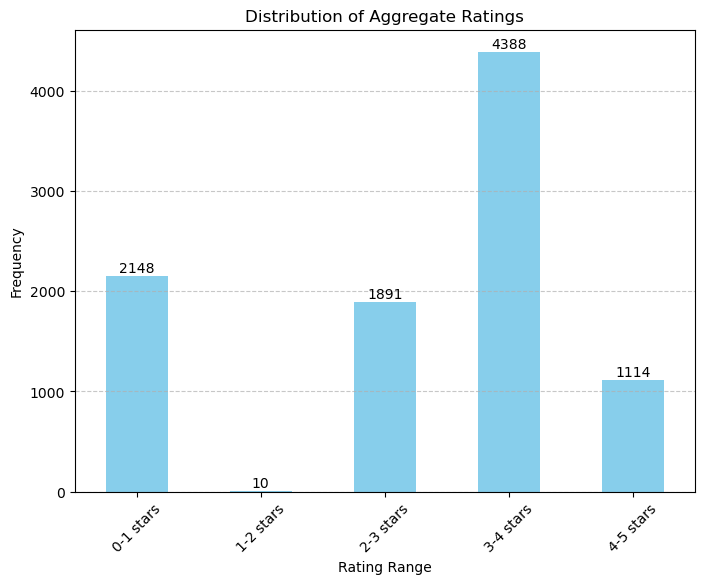


Most common rating range: 3-4 stars


In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Dataset .csv')

# Assuming the dataset has a column named 'aggregate_rating' containing aggregate ratings
aggregate_ratings = data['Aggregate rating']

# Analyze the distribution of aggregate ratings
rating_ranges = pd.cut(aggregate_ratings, bins=   [0, 1, 2, 3, 4, 5], include_lowest=True, labels=['0-1 stars', '1-2 stars', '2-3 stars', '3-4 stars', '4-5 stars'])
rating_distribution =    rating_ranges.value_counts().sort_index()

# Determine the most common rating range
most_common_range = rating_distribution.idxmax()

# Plotting the distribution of aggregate ratings
plt.figure(figsize=(8, 6))
bar_plot = rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values above each bar
for i, value in enumerate(rating_distribution):
    plt.text(i, value +    5, str(value), ha='center', va='bottom')

plt.show()

# Print the most common rating range
print("\n\033[1mMost common rating range:\033[0m", most_common_range)


In [19]:


# Assuming the dataset has a column named 'Votes' containing the number of votes received by each restaurant
number_of_votes = data['Votes']

# Calculate the average number of votes received
average_votes = number_of_votes.mean()

# Print the average number of votes received by restaurants with 1 decimal place
print("\n\033[1mAverage number of votes received by restaurants: {:.1f}\033[0m".format(average_votes))



Average number of votes received by restaurants: 156.9


# Task 2

Task: Cuisine Combination


In [20]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Dataset .csv')
# Drop rows with missing values in the 'Cuisines' column
data = data.dropna(subset=['Cuisines'])

In [21]:
def remove_invalid_chars(column):
    return column.replace('��', '')

# Apply the function to all columns
for col in data.columns:
    data[col] = remove_invalid_chars(data[col])

# Save the cleaned dataset back to a file
# Replace 'cleaned_dataset.csv' with the desired filename
data.to_csv('cleaned_dataset.csv', index=False)

In [22]:


# Extract cuisine combinations
cuisine_combinations = data['Cuisines'].str.split(', ')

# Count the frequency of each cuisine combination
combination_counts = {}
for cuisines in cuisine_combinations:
    for cuisine in cuisines:
        cuisine = cuisine.strip()  # Remove leading/trailing whitespaces
        if cuisine in combination_counts:
            combination_counts[cuisine] += 1
        else:
            combination_counts[cuisine] = 1

# Determine the most common cuisine combinations
most_common_combinations = sorted(combination_counts.items(),    key=lambda x: x[1], reverse=True)[:10]

# Create a DataFrame from the most common cuisine combinations
df = pd.DataFrame(most_common_combinations, columns=['Cuisine Combination ', '  Frequency of Restaurants'])

# Print the DataFrame
print("Top 10 Most Common Cuisine Combinations:")
print("\n", "-" * 45)

print(df)


Top 10 Most Common Cuisine Combinations:

 ---------------------------------------------
  Cuisine Combination     Frequency of Restaurants
0         North Indian                        3960
1              Chinese                        2735
2            Fast Food                        1986
3              Mughlai                         995
4              Italian                         764
5               Bakery                         745
6          Continental                         736
7                 Cafe                         703
8             Desserts                         653
9         South Indian                         636


In [23]:

# Drop rows with missing values in the 'Cuisines' and 'Aggregate rating' columns
data = data.dropna(subset=['Cuisines', 'Aggregate rating'])

# Extract cuisine combinations
cuisine_combinations = data['Cuisines'].str.split(', ')

# Determine the average rating for each cuisine combination
ratings_by_combination = {}
for cuisines, rating in zip(cuisine_combinations, data['Aggregate rating']):
    cuisines = [cuisine.strip() for cuisine in cuisines]  # Remove leading/trailing whitespaces
    for cuisine in cuisines:
        if cuisine not in ratings_by_combination:
            ratings_by_combination[cuisine] = []
        ratings_by_combination[cuisine].append(rating)

# Calculate the average rating for each cuisine combination
average_ratings = {cuisine: sum(ratings) / len(ratings) for cuisine, ratings   in ratings_by_combination.items()}

# Get the top 50 cuisine combinations by average rating
top_50_combinations = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)[:50]


# Calculate the average rating of the top 50 combinations
total_rating = sum(rating for combination, rating in top_50_combinations)
average_rating = total_rating / len(top_50_combinations)

# Print the average rating
# Get the average rating of the top 50 cuisine combinations
average_rating_top_50 = sum(ratings for _, ratings in top_50_combinations) / 50

# Print the average rating of the top 50 cuisine combinations in bold
print("\033[1m" + f"Average Higher Rating of Top 50 Cuisine Combinations: {average_rating_top_50:.2f}" +  "  \033[0m")
print( "-" * 45)
print("\nTop 50 Cuisine Combinations by Average Higher Rating:")
for i, (combination, rating) in enumerate(top_50_combinations, start=1):
    print(f"{i}. {combination}: {rating:.2f}")

Average Higher Rating of Top 50 Cuisine Combinations: 4.26  
---------------------------------------------

Top 50 Cuisine Combinations by Average Higher Rating:
1. Sunda: 4.90
2. B�_rek: 4.70
3. Taiwanese: 4.65
4. Ramen: 4.50
5. Dim Sum: 4.47
6. Hawaiian: 4.41
7. Bubble Tea: 4.40
8. D�_ner: 4.40
9. Curry: 4.40
10. Kebab: 4.38
11. Izgara: 4.35
12. Filipino: 4.34
13. Scottish: 4.33
14. South African: 4.33
15. Turkish Pizza: 4.33
16. Kiwi: 4.30
17. Gourmet Fast Food: 4.30
18. Argentine: 4.30
19. Teriyaki: 4.30
20. Irish: 4.30
21. Fish and Chips: 4.30
22. Durban: 4.30
23. World Cuisine: 4.30
24. Contemporary: 4.29
25. Indonesian: 4.29
26. Modern Indian: 4.28
27. Caribbean: 4.27
28. International: 4.25
29. Cajun: 4.20
30. Deli: 4.20
31. Southwestern: 4.19
32. Charcoal Grill: 4.18
33. Cuban: 4.15
34. Western: 4.14
35. Tapas: 4.13
36. Southern: 4.13
37. British: 4.11
38. New American: 4.10
39. Parsi: 4.10
40. Spanish: 4.08
41. Vegetarian: 4.07
42. Iranian: 4.07
43. Sandwich: 4.07
44. Latin A

# Task 3

Task: Geographic Analysis

In [24]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [25]:
import plotly.express as px

# Create a scatter plot of restaurant locations on a map using Plotly
fig = px.scatter_mapbox(data, lat='Latitude', lon='Longitude', hover_name='Restaurant Name', zoom=1)
fig.update_layout(mapbox_style='open-street-map')
fig.show()


In [26]:
data.shape

(9542, 21)

In [27]:
data[['Latitude', 'Longitude']].isnull().sum()

Latitude     0
Longitude    0
dtype: int64

C:\Users\rekha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



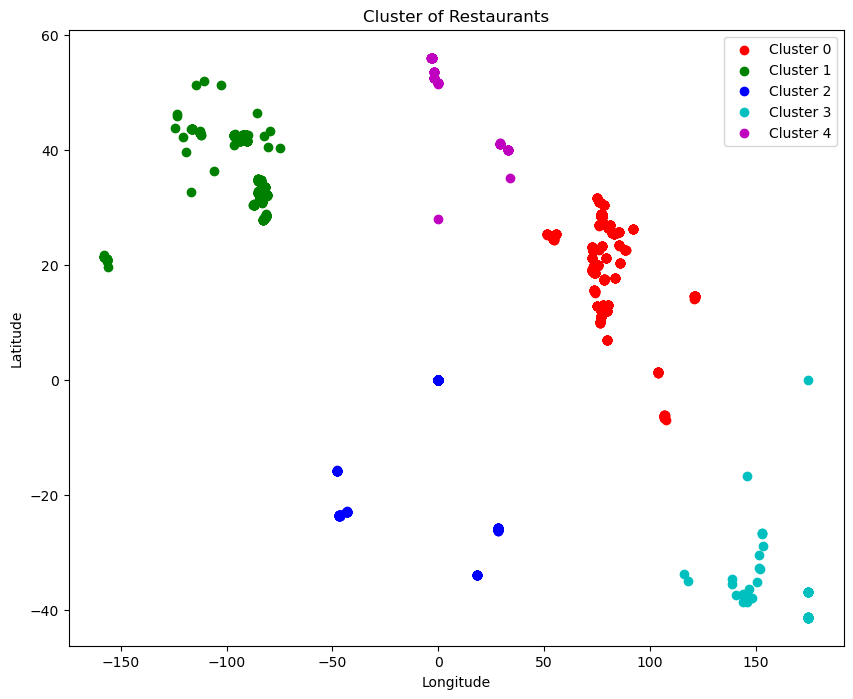

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data' contains latitude and longitude coordinates of restaurants
X = data[['Latitude', 'Longitude']]

# Apply K-means clustering
k = 5  # Number of clusters (you can adjust this)
kmeans  = KMeans(n_clusters=k)
data['Cluster'] =   kmeans.fit_predict(X)

# Plot the clustered restaurant locations
plt.figure(figsize=(10, 8 ) )
colors = ['r', 'g', 'b', 'c', 'm']  # Color for each cluster
for cluster in range(k):
    cluster_data = data[data['Cluster'] ==   cluster]
    plt.scatter(cluster_data['Longitude'],   cluster_data['Latitude'], color=colors [cluster], label=f'Cluster {cluster}')
plt.title('Cluster of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [30]:
import folium
import pandas as pd
import numpy as np



# Create a map centered around India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Define colors for each cluster
colors = ['red','green', 'blue', 'cyan','magenta']

# Plot each restaurant location
for lat, lon, cluster in zip(data['Latitude'],  data['Longitude'],   data['Cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7,
        parse_html=False).add_to(m)

# Display the map
m


In [33]:
import plotly.graph_objs as go
import scipy.cluster.hierarchy as hierarchy

# Load the data into a pandas DataFrame
data = pd.read_csv('Dataset .csv')
# Create a scatter mapbox plot
fig = go.Figure(go.Scattermapbox(
    lat=data['Latitude'],  # Replace with latitude of Indian location
    lon=data['Longitude'],  # Replace with longitude of Indian location
    mode='markers',
    marker=go.Marker(
        size=8,
        color='light blue',
        opacity=0.8
      ),
    name="Restaurants "  # Add this line
))

# Apply clustering algorithm
Z = hierarchy.linkage(data[['Latitude', 'Longitude']], method='ward')
criteria = hierarchy.fcluster(Z, t=0.85*max(Z[:,2]), criterion='distance')

# Add cluster markers to the plot
for i in range(len(criteria)):
    if criteria[i] == i:
        cluster_data = data.loc[criteria == i]
        fig.add_trace(go.Scattermapbox(
            lat=[cluster_data['Latitude'].mean()]*len(cluster_data),
            lon=[cluster_data['Longitude'].mean()]*len(cluster_data),
            mode='markers',
            marker=go.Marker(
                size=20,
                color='red',
                opacity=0.8
              ),
            name=f"Specific Area {i}"  # Add this line
        ))

# Set the mapbox style and center
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center_lat=data['Latitude'].mean(),  # Center latitude on Indian location
    mapbox_center_lon=data['Longitude'].mean(),  # Center longitude on Indian location
    mapbox_zoom=5
)

# Show the plot
fig.show()


C:\Users\rekha\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\rekha\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




# Task 4

Task: Restaurant Chains


In [34]:
# Identify restaurant chains
restaurant_chains = data['Restaurant Name'].value_counts()[data['Restaurant Name'].value_counts()   > 1]

# Print the list of restaurant chains in a DataFrame
if len(restaurant_chains) > 0:
    df_chains = pd.DataFrame({'Restaurant Chain': restaurant_chains.index, 'Count':   restaurant_chains.values  })
    print("Restaurant Chains in the Dataset:")
    print(df_chains)
else:
    print("No restaurant chains found in the dataset.")

Restaurant Chains in the Dataset:
       Restaurant Chain  Count
0       Cafe Coffee Day     83
1        Domino's Pizza     79
2                Subway     63
3      Green Chick Chop     51
4            McDonald's     48
..                  ...    ...
729           Town Hall      2
730         Halki Aanch      2
731      Snack Junction      2
732   Delhi Biryani Hut      2
733  Beliram Degchiwala      2

[734 rows x 2 columns]


In [36]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Dataset .csv')

# Calculate average ratings and popularity for each restaurant chain
chain_ratings = data.groupby('Restaurant Name')['Aggregate rating'].mean().sort_values(ascending=False)
chain_popularity = data['Restaurant Name'].value_counts()

# Print the average ratings and popularity for each restaurant chain
print("\nAverage Ratings for Different Restaurant Chains:")
print(chain_ratings)

print("\nPopularity of Different Restaurant Chains (Number of Locations):")
print(chain_popularity)



Average Ratings for Different Restaurant Chains:
Restaurant Name
Restaurant Mosaic @ The Orient     4.9
Ministry of Crab                   4.9
Miann                              4.9
Shorts Burger and Shine            4.9
Milse                              4.9
                                  ... 
Cafe Corner                        0.0
Pheva Tandooris                    0.0
Pick & Carry                       0.0
Cafe Brownie                       0.0
Famous Parantha and Poori Sabzi    0.0
Name: Aggregate rating, Length: 7446, dtype: float64

Popularity of Different Restaurant Chains (Number of Locations):
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dt